In [1]:
import matplotlib.pyplot as plt
import numpy as np
import typy
import pandas as pd

In [2]:
r_space = np.linspace(0.6,0,100,endpoint=False)
theta_space = np.linspace(0,2*np.pi,360,endpoint=False)
radial_mesh = np.array([[r*np.cos(theta),r*np.sin(theta)] for r in r_space for theta in theta_space])
rx,ry= radial_mesh.T

In [3]:
nk = 100*100
nq = radial_mesh.shape[0]
# nph = 9
i=0

In [5]:
directory = "/scratch/s.sevim/0_NbSe2_Work/0.00565/"

In [6]:
epw_ph = np.loadtxt(f"{directory}/results/omega/omega_{i+1}.dat").reshape(nq,nk).T

In [ ]:
epw_ph

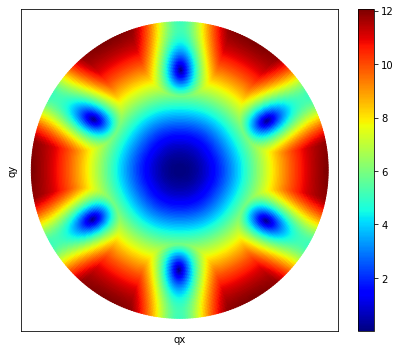

In [9]:
fig = plt.figure(figsize=(6,5))
plt.scatter(rx,ry,c=epw_ph[0],s=20,cmap="jet")
plt.colorbar()
plt.axis('equal')
plt.xlabel("qx")
plt.ylabel("qy")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

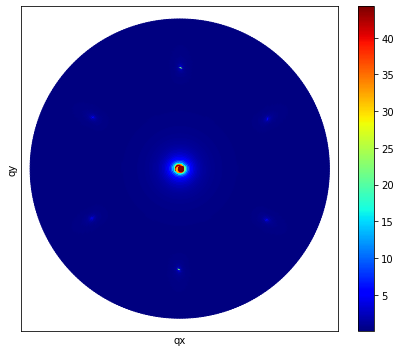

In [10]:
fig = plt.figure(figsize=(6,5))
plt.scatter(rx,ry,c=1/epw_ph[0],s=20,cmap="jet")
plt.colorbar()
plt.axis('equal')
plt.xlabel("qx")
plt.ylabel("qy")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [12]:
epw_g = np.loadtxt(f"{directory}/results/gkk/gkk_{i+1}.dat").reshape(nq,nk).T

In [13]:
epw_gbar = epw_g.sum(axis=0)


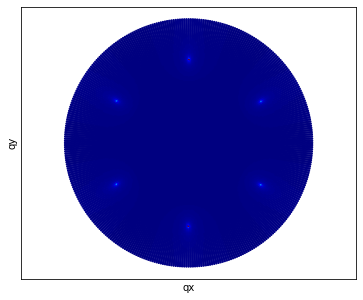

In [25]:
fig = plt.figure(figsize=(6,5))
plt.scatter(rx,ry,c=epw_gbar**2,s=2,cmap="jet")
plt.axis('equal')
plt.xlabel("qx")
plt.ylabel("qy")
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
epw_k = np.loadtxt(f"/{directory}/results/enk/enk_{i+1}.dat").reshape(nq,nk).T
epw_kq = np.loadtxt(f"/{directory}/results/enkq/enkq_{i+1}.dat").reshape(nq,nk).T

In [22]:
ef = 1.126000
delta=0.0001
selfen = np.zeros(shape=(nq))
for j in range(nq):
    epc = (epw_g[i].T[j]*epw_g[i].T[j])*10**-6
    fsn = (typy.fd(epw_k.T[j]-ef)-typy.fd(epw_kq.T[j]-ef))/(epw_k.T[j]-epw_kq.T[j]+1j*delta)
    res=np.sum(epc*fsn).real
    selfen[j]=res

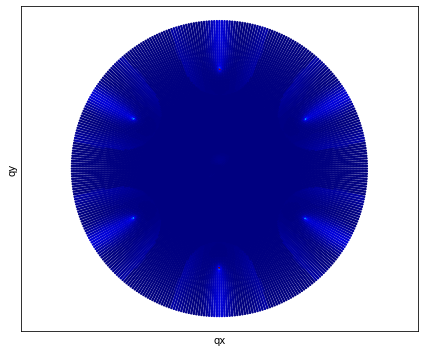

In [24]:
fig = plt.figure(figsize=(6,5))
plt.scatter(rx,ry,c=-selfen,s=2,cmap="jet")
# plt.colorbar()
plt.axis('equal')
plt.xlabel("qx")
plt.ylabel("qy")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [29]:
omega2 = selfen-np.sqrt(epw_ph[0]**2+selfen**2)

In [27]:
omega1 = selfen+np.sqrt(epw_ph[0]**2+selfen**2)

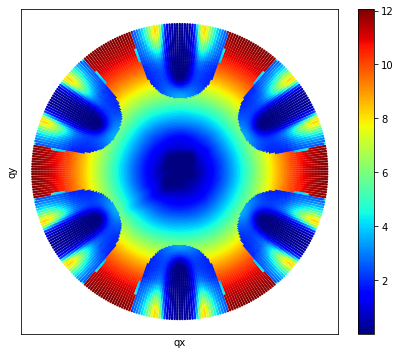

In [31]:
fig = plt.figure(figsize=(6,5))
plt.scatter(rx,ry,c=omega1,s=2,cmap="jet")
# plt.colorbar()
plt.axis('equal')
plt.xlabel("qx")
plt.ylabel("qy")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.colorbar()
plt.show()

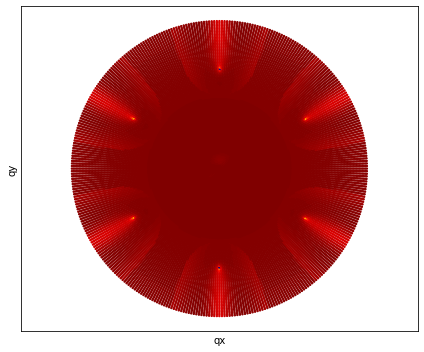

In [30]:
fig = plt.figure(figsize=(6,5))
plt.scatter(rx,ry,c=omega2,s=2,cmap="jet")
# plt.colorbar()
plt.axis('equal')
plt.xlabel("qx")
plt.ylabel("qy")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
plt.scatter(rx,ry,c=-selfen,s=2,cmap="jet")
# plt.colorbar()
plt.axis('equal')
plt.xlabel("qx")
plt.ylabel("qy")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
epw_ph = np.zeros(shape=(nph,nk,nq))
epw_g = np.zeros(shape=(nph,nk,nq))
epw_gbar = np.zeros(shape=(nph,nq))
epw_k = np.zeros(shape=(nph,nk,nq))
epw_kq = np.zeros(shape=(nph,nk,nq))
for i in range(nph):
    epw_ph[i] = np.loadtxt(f"{directory}/results/omega/omega_{i+1}.dat").reshape(nq,nk).T
    epw_g[i] = np.loadtxt(f"{directory}/results/gkk/gkk_{i+1}.dat").reshape(nq,nk).T
    epw_gbar[i] = epw_g[i].sum(axis=0)
    epw_k[i] = np.loadtxt(f"/{directory}/results/enk/enk_{i+1}.dat").reshape(nq,nk).T
    epw_kq[i] = np.loadtxt(f"/{directory}/results/enkq/enkq_{i+1}.dat").reshape(nq,nk).T